# INTRODUCTION:

In today’s competitive telecom industry, customer retention has become more important than customer acquisition. Retaining an existing customer is significantly cheaper than acquiring a new one, and businesses that can identify customers at risk of leaving gain a powerful advantage. Customer churn refers to the phenomenon where customers stop doing business with a company within a given time frame.

By analyzing customer data such as tenure, monthly charges, demographics, and service usage, we can build machine learning models that predict whether a customer is likely to churn. This helps companies take proactive measures to retain customers, improve satisfaction, and increase revenue.

# PROBLEM STATEMENT:

The telecom company is facing revenue loss due to customer churn. The goal of this project is to:

1.	Analyze customer demographics, usage patterns, and subscription details to identify factors that contribute to churn.

2.	Build machine learning models to predict whether a customer is likely to churn.

3.	Generate business insights from the analysis to help decision-makers design targeted retention strategies.

4.	Recommend actionable steps that the company can take to reduce churn and improve customer loyalty.

In [1]:
pip install shap

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap


In [3]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

# DATA CLEANING AND  PROCESSING:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# REMOVING CUSTOMER ID COLUMN
df.drop(columns=["customerID"] , inplace = True)

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Checking class imbalance

In [9]:
#CHECKING CLASS IMBALANCE
df['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [10]:
#CHECKING CLASS IMBALANCE
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [11]:
#SHOWING UNIQUE VLUES OF CATEGORICAL COLUMNS
for col in df.columns:
  if col not in ['tenure','MonthlyCharges','TotalCharges']:
    print(col,df[col].unique())


gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


## Null values inspection

In [12]:
#CHECKING NULL VALUES
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0




Observation result:

There are no missing values across all columns.



## Missing value inspection

---



In [13]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


## Duplicate value inspection

---



In [14]:
# CHECKING FOR DUPLICATES
print(f'Duplicate observations: {df.duplicated().sum()}')

Duplicate observations: 22




Observation result:

There are no duplicates in data



In [15]:
#CHEKING FOR BLANK AND EMPTY STRING VALUES
for col in ['tenure','MonthlyCharges','TotalCharges']:
  print(col,len(df[df[col]==" "]))
  print("--------------------------")

tenure 0
--------------------------
MonthlyCharges 0
--------------------------
TotalCharges 11
--------------------------


In [16]:
#REPLACING BLANK AND EMPTY STRING VALUES WITH 0.0
df['TotalCharges'] = df['TotalCharges'].replace({" ":"0.0"}).astype(float)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
#CHECK CLASS IMBALANCE
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [19]:
df.shape

(7043, 20)

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Numerical summary statistics

---



In [21]:
#NUMERICAL SUMMARY STATISTICS
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# EXPLORATORY DATA ANALYSIS

## **Distribution and boxplot of numerical features:**

This plot provides insights into the distribution of the feature values and highlights central tendencies (mean & median) along with potential outliers.

In [22]:
#FUNCTION TO PLOT HISTOGRAM AND BOXPLOT
def plot_distribution(df,column_name):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  sns.histplot(df[column_name],kde = True)
  plt.title(f"distribution of {column_name}")

  col_mean = df[column_name].mean()
  col_median = df[column_name].median()
  plt.axvline(col_mean,color = "red",linestyle="--",label="mean")
  plt.axvline(col_median,color = "blue",linestyle="--",label="median")
  plt.legend()
  plt.subplot(1,2,2)
  sns.boxplot(y=df[column_name])
  plt.title(f"boxplot of {column_name}")
  plt.show()

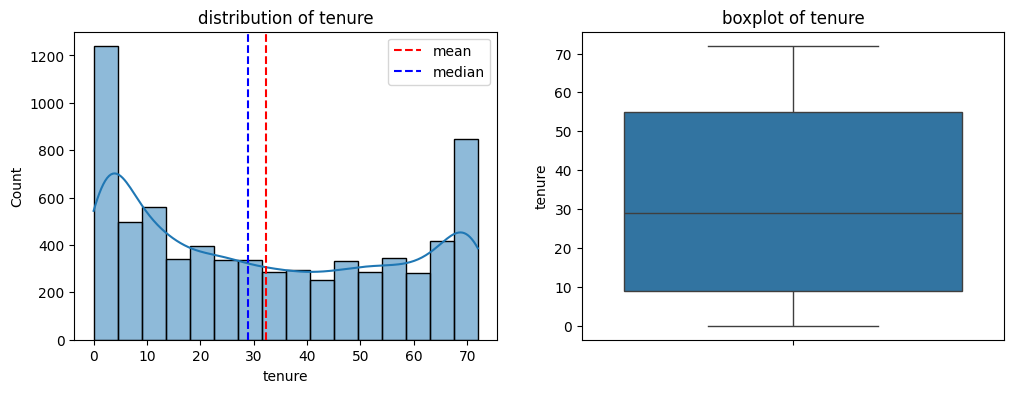

In [23]:
plot_distribution(df,"tenure")


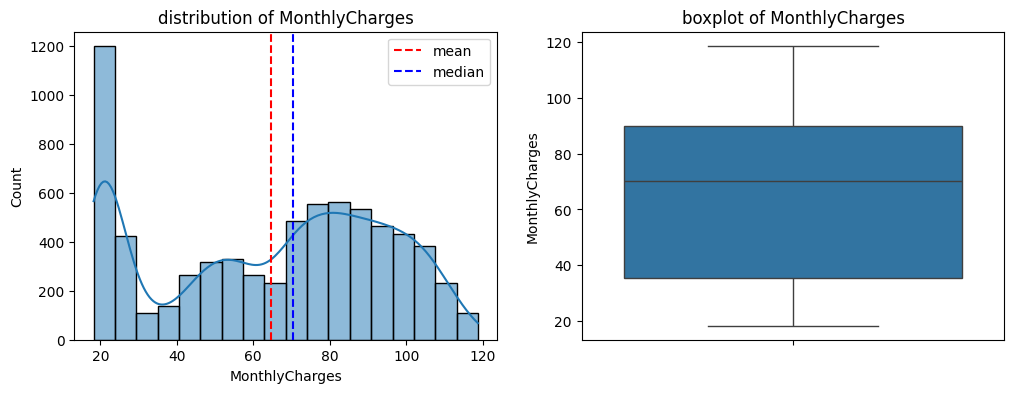

In [24]:
plot_distribution(df,"MonthlyCharges")

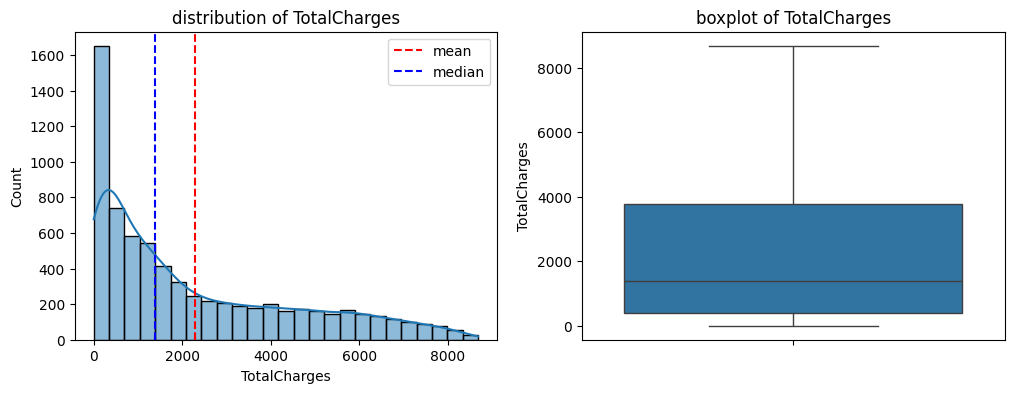

In [25]:
plot_distribution(df,"TotalCharges")

OBSERVATION RESULTS:

There are no outliers

## Correlation heatmap

---



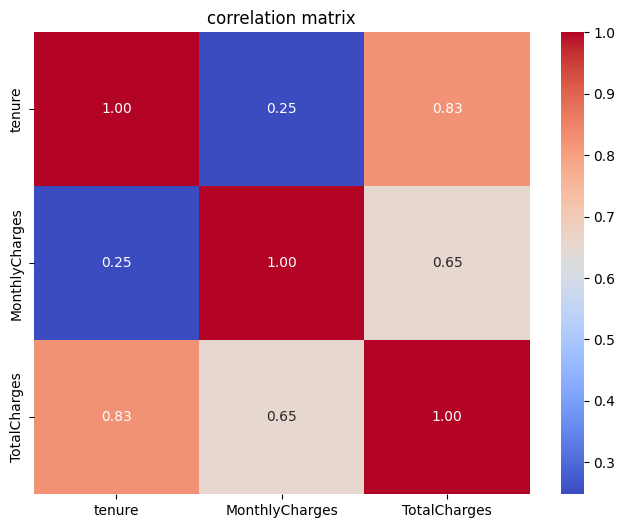

In [26]:
#CORRELATION HEATMAP
plt.figure(figsize=(8,6))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True , cmap="coolwarm",fmt=".2f")
plt.title("correlation matrix")
plt.show()

## **Distribution of categoricals features by churn status**:

These plots show how the distribution of each categorical feature varies between customers who churned and those who did not. This helps identify patterns and potential predictors of churn.

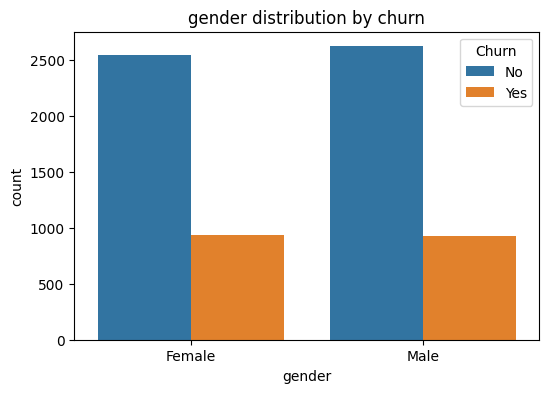

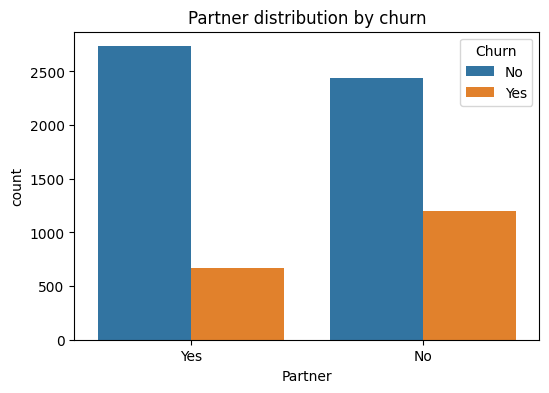

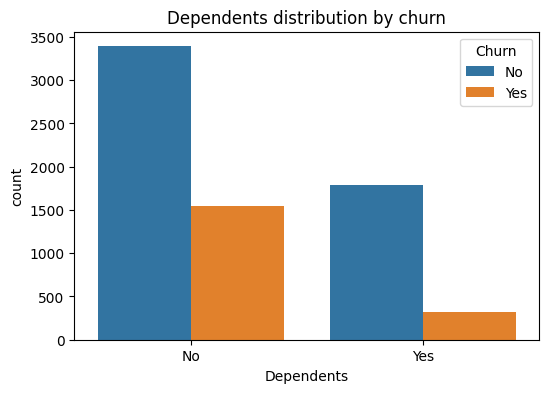

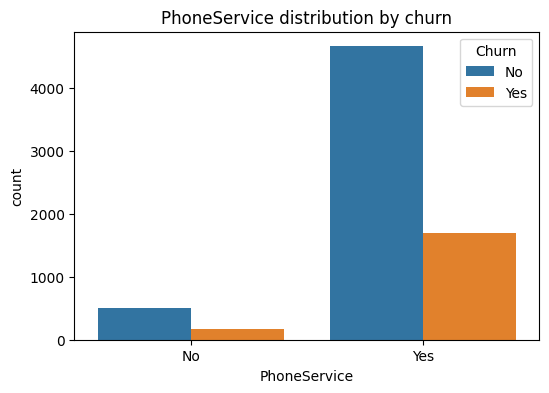

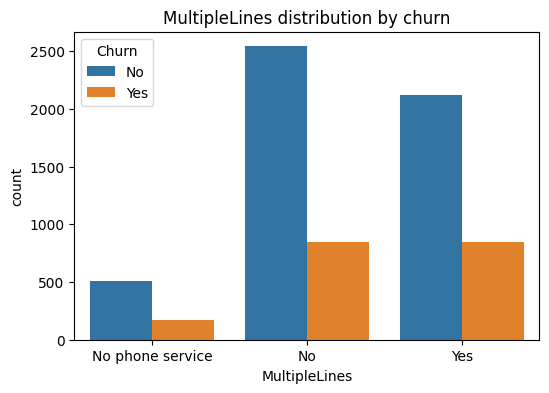

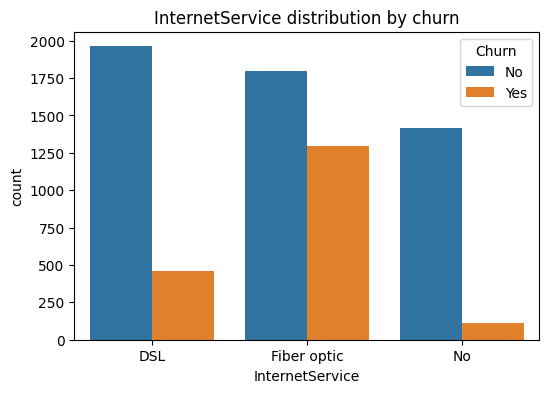

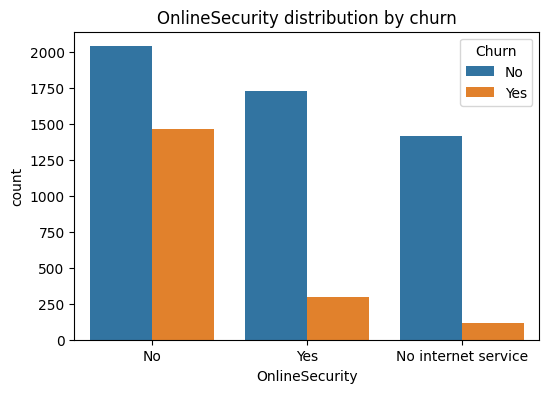

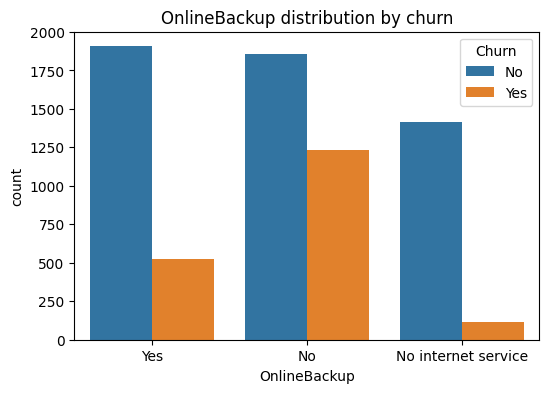

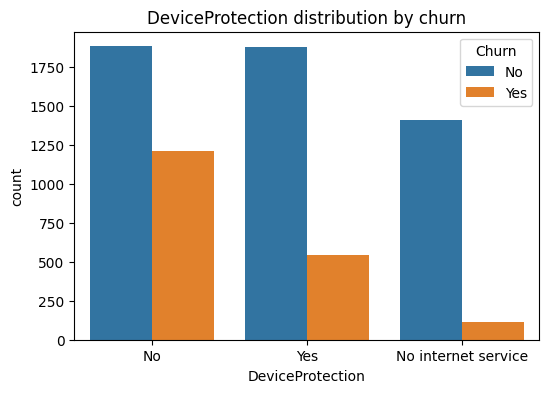

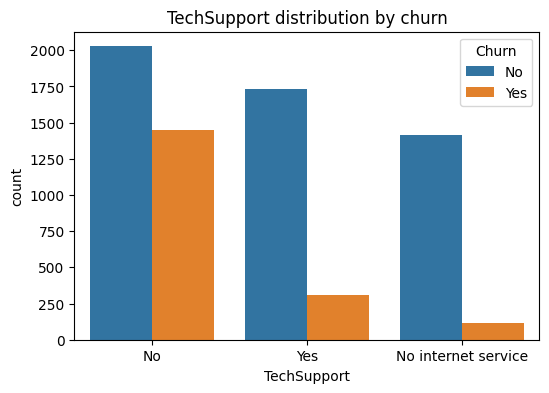

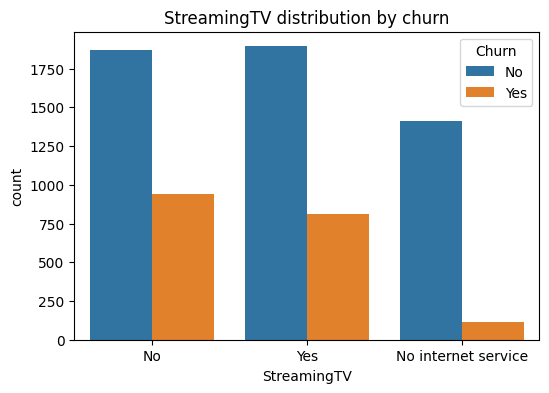

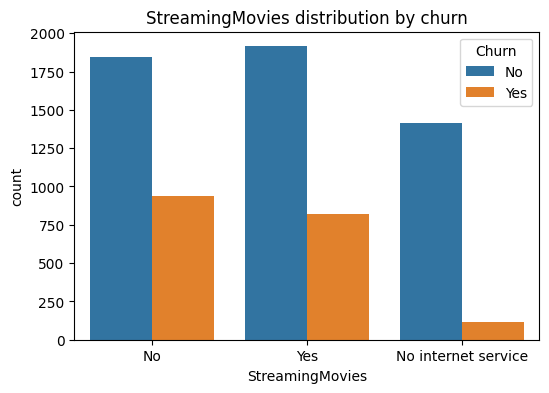

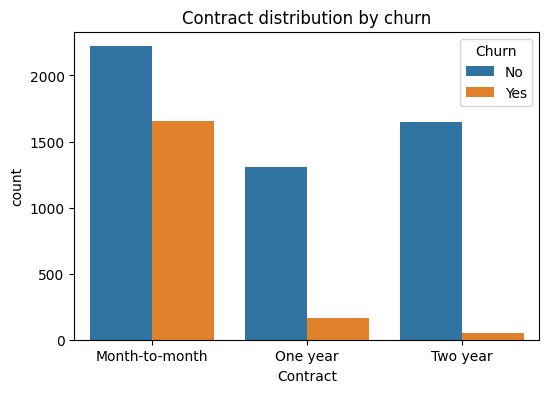

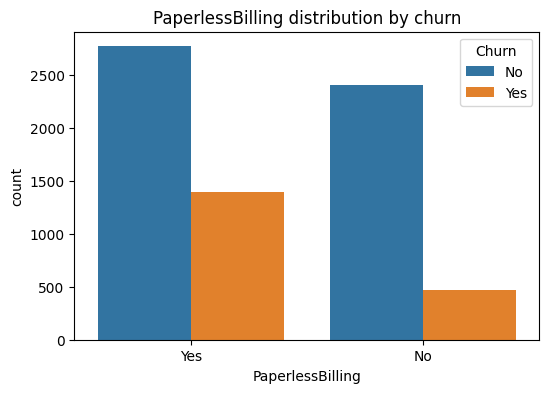

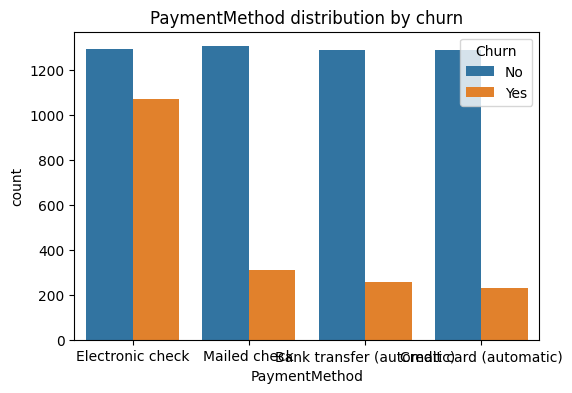

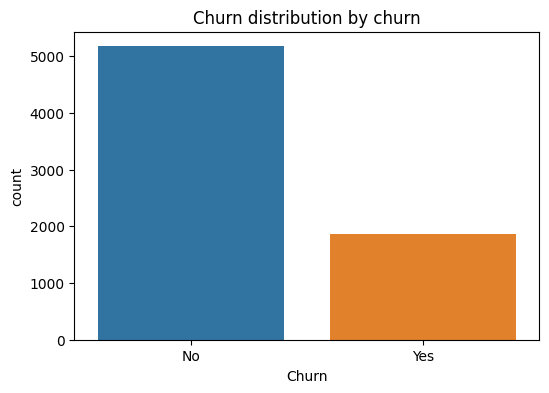

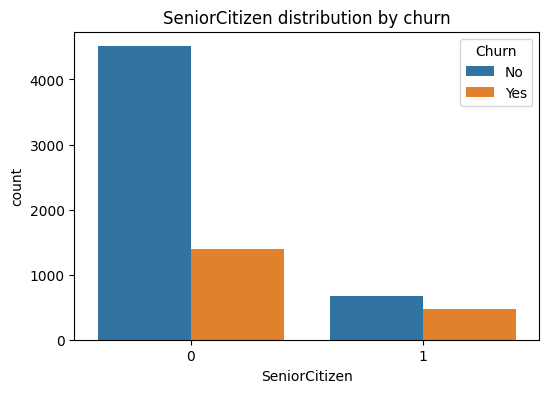

In [27]:
categorical_cols = df.select_dtypes(include="object").columns.to_list()+['SeniorCitizen']

for col in categorical_cols:
  plt.figure(figsize=(6,4))
  sns.countplot(data = df,x=col,hue='Churn')
  plt.title(f"{col} distribution by churn")
  plt.show()

## Label encoding of target column

In [28]:
#LABEL ENCODING
df['Churn'] = df['Churn'].replace({"Yes" : 1,"No": 0})

/tmp/ipython-input-2532059317.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({"Yes" : 1,"No": 0})


In [29]:
print([col for col in df.columns if "churn" in col.lower()])

['Churn']


In [30]:
df = df.drop(columns=['churn'],errors='ignore')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Correlation Analysis Between Churn and Numerical Features

Using 'Churn' as the churn column.


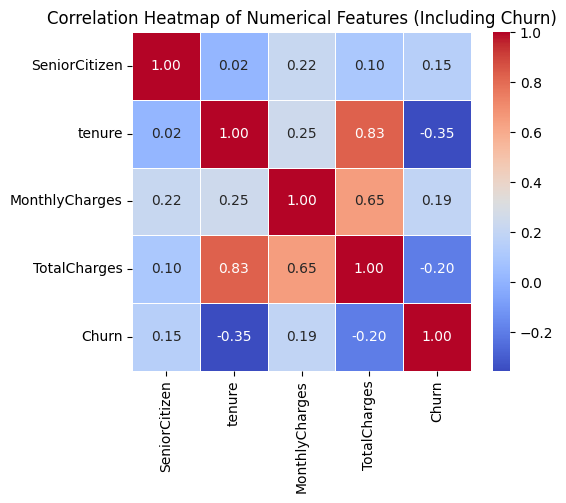

In [32]:
churn_col = None
for col in df.columns:
    if 'churn' in col.lower():
        churn_col = col
        break

if churn_col is None:
    raise ValueError("No column containing 'churn' found in the DataFrame.")

print(f"Using '{churn_col}' as the churn column.")

# --- Step 2: Convert churn to numeric if it's not already ---
if df[churn_col].dtype == 'object':
    df[churn_col] = df[churn_col].map({'No': 0, 'Yes': 1})

# --- Step 3: Select numerical columns including churn ---
numeric_df = df.select_dtypes(include='number')

# --- Step 4: Compute correlation matrix ---
corr_matrix = numeric_df.corr()

# --- Step 5: Plot full-grid heatmap ---
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features (Including Churn)")
plt.tight_layout()

Observation:

From the correlation heatmap, we observe that tenure has the strongest negative relationship with churn (-0.35), indicating that long-term customers are less likely to leave. Monthly charges (0.19) and senior citizen status (0.15) show weak positive correlations with churn, suggesting that higher bills and older age groups may contribute slightly to customer attrition. However, since most correlations are weak, churn prediction requires considering multiple features together rather than relying on a single factor.

In [33]:
objects_columns = df.select_dtypes(include="object").columns
objects_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

## Label encoding of categorical features

Each categorical feature is converted into numerical format using LabelEncoder, and the encoders are stored in a dictionary for future transformation (e.g., during inference or deployment).

In [34]:
from sklearn.preprocessing import LabelEncoder
encoders = {}

for column in objects_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


In [35]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [36]:
#SAVING LABEL ENCODERS FOR FUTURE USE
import pickle
with open("encoder.pkl","wb") as f:
  pickle.dump(encoders,f)

## Standardization of numerical features

In [37]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['tenure','MonthlyCharges','TotalCharges']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [38]:
df["Churn"].value_counts()

,count
Churn,
0,5174
1,1869


In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,ConfusionMatrixDisplay

## Data splitting

In [40]:
X = df.drop(columns=["Churn"])
Y = df["Churn"]

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [42]:
y_train.value_counts()

,count
Churn,
0,4138
1,1496


## Handling class imbalance with SMOTE

In [43]:
smote = SMOTE(random_state=42)

In [44]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [45]:
y_train_smote.value_counts()

,count
Churn,
0,4138
1,4138


# MODEL EVALUATION


## **Defining Classification Models for Comparison**

In [46]:
models = {
    "random forest": RandomForestClassifier(random_state=42,class_weight="balanced"),
    "XGBoost": XGBClassifier(random_state=42)
}

## Hyperparameter tuning

In [47]:
hyperparameters = {
    "random forest": {
        "n_estimators":[50,100,200],
        "max_depth":[5,10,None],
    },
    "XGBoost": {
        "learning_rate":[0.01,0.1,0.2],
        "max_depth":[3,5,7],
    }
}

**Each model is tuned using GridSearchCV with 5-fold cross-validation to identify the best hyperparameters that maximize accuracy. The best estimators and their performance scores are stored for further evaluation.**

In [48]:
best_models = {}
for model_name,model in models.items():
  print(f"tuning {model_name}.....")
  grid = GridSearchCV(estimator=model,param_grid=hyperparameters[model_name],cv = 5,scoring="accuracy")
  grid.fit(X_train_smote,y_train_smote)
  best_models[model_name]=grid.best_estimator_
  print(f"best parameter for {model_name} : {grid.best_params_}")
  print(f"best accuracy for {model_name} : {grid.best_score_:.2f}\n")

tuning random forest.....
best parameter for random forest : {'max_depth': None, 'n_estimators': 200}
best accuracy for random forest : 0.84

tuning XGBoost.....
best parameter for XGBoost : {'learning_rate': 0.2, 'max_depth': 7}
best accuracy for XGBoost : 0.82



In [65]:
with open ("best_model.pkl","wb") as f:
  pickle.dump(best_models['random forest'],f)

In [50]:
with open ("scaler.pkl","wb") as f:
  pickle.dump(scaler,f)

**Making Predictions on Test Set (Random Forest)**

The best-performing Random Forest model is used to generate predictions (y_test_pred) and churn probabilities (y_test_prob) on the test data for evaluation.

In [51]:
y_test_pred = best_models["random forest"].predict(X_test)
y_test_prob = best_models["random forest"].predict_proba(X_test)[:,1]

In [52]:
y_test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [53]:
y_test_prob

array([0.915, 0.42 , 0.01 , ..., 0.   , 0.02 , 0.35 ])

## **Model Evaluation Metrics (Random Forest)**

The Random Forest model is evaluated on the test set using accuracy, ROC AUC score, confusion matrix, and a detailed classification report based on a custom probability threshold of 0.3 to assess performance more effectively on imbalanced data.

Accuracy :  0.7785663591199432
ROC_AUC_Score :  0.7456201413976212


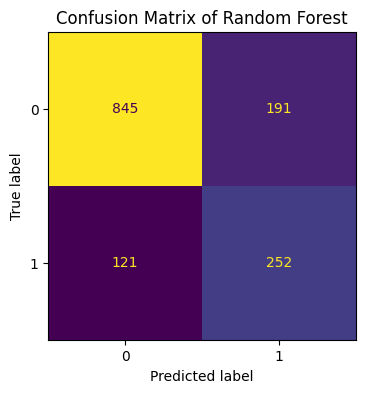

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.65      0.76      1036
           1       0.47      0.86      0.60       373

    accuracy                           0.70      1409
   macro avg       0.70      0.75      0.68      1409
weighted avg       0.80      0.70      0.72      1409



In [54]:
print(f"Accuracy : ",accuracy_score(y_test,y_test_pred))
print(f"ROC_AUC_Score : ",roc_auc_score(y_test,y_test_pred))
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
cm = confusion_matrix(y_test, y_test_pred, labels=best_models["random forest"].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_models["random forest"].classes_)
disp.plot(ax=ax, colorbar=False)
ax.set_title("Confusion Matrix of Random Forest")
plt.show()

y_pred_custom = (y_test_prob>=0.3).astype(int)
print(f"Classification report : \n",classification_report(y_test,y_pred_custom))

## Feature importance

/tmp/ipython-input-1065155349.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance_df.head(20), x='Importance', y='Feature', palette='viridis')


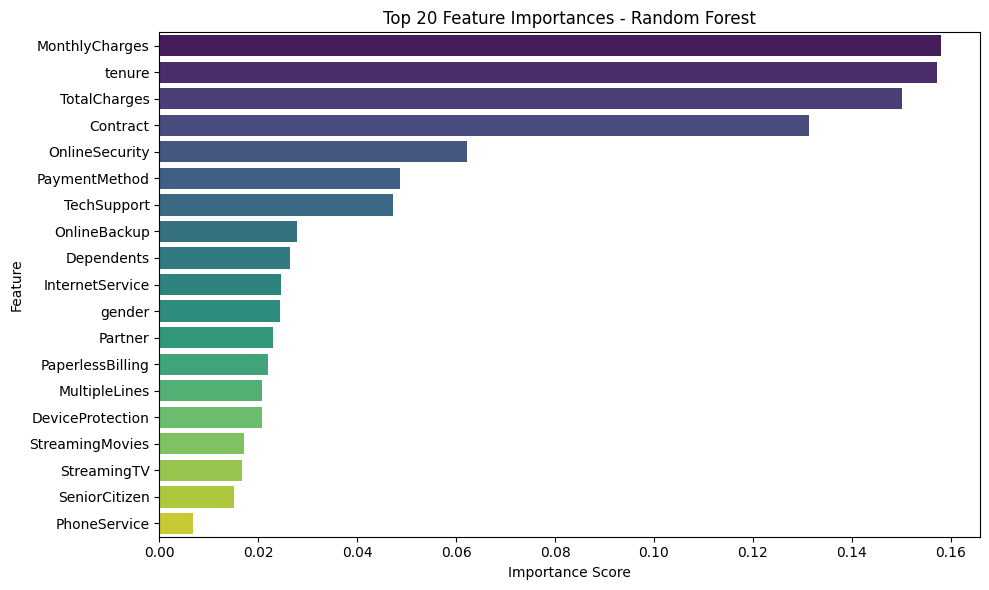

In [55]:
rf_model = best_models["random forest"]

# Get feature importances and their corresponding feature names
importances = rf_model.feature_importances_

# Get feature names from your training data
feature_names = X_train_smote.columns

# Create a DataFrame for easy plotting
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [66]:
with open ("best_model.pkl","rb") as f:
  loaded_model = pickle.load(f)
with open ("encoder.pkl","rb") as f:
  encoders = pickle.load(f)
with open ("scaler.pkl","rb") as f:
  scaler_data = pickle.load(f)


In [67]:
from google.colab import files
files.download("best_model.pkl")
files.download("encoder.pkl")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Prediction Function for New Customer Data

This function accepts raw input data, applies necessary preprocessing steps (stripping strings, encoding categorical features, scaling numerical features), and uses the trained model to predict churn along with the associated probability.

In [63]:
def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    for col in input_df.select_dtypes(include='object').columns:
        input_df[col] = input_df[col].str.strip()
    for col, encoder in encoders.items():
        input_df[col] = encoder.transform(input_df[col])
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_df[numerical_cols] = scaler_data.transform(input_df[numerical_cols])
    prediction = loaded_model.predict(input_df)[0]
    probability = loaded_model.predict_proba(input_df)[0, 1]

    return "Churn" if prediction == 1 else "No Churn", probability

In [58]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [61]:
example_input = {
    "gender" : 'Male',
    "SeniorCitizen" : 0,
    "Partner" : 'No ',
    "Dependents" : 'No',
    "tenure" : 2,
    "PhoneService" : 'Yes',
    "MultipleLines" : 'No',
    "InternetService" : 'DSL',
    "OnlineSecurity" : 'Yes',
    "OnlineBackup" : 'Yes',
    "DeviceProtection" : 'No',
    "TechSupport" : 'No',
    "StreamingTV" : 'No',
    "StreamingMovies" : 'No',
    "Contract" : 'Month-to-month',
    "PaperlessBilling" : 'Yes',
    "PaymentMethod" : 'Mailed check',
    "MonthlyCharges" : 53.85,
    "TotalCharges" : 108.15


}

In [64]:
prediction , prob = make_prediction(example_input)
print(f"prediction : {prediction},probability : {prob:.2f}")

prediction : Churn,probability : 0.81


# BUSINESS INSIGHT

1.	Tenure Matters:

	•	Customers with longer tenure are less likely to churn.

	•	Newer customers are at higher risk of leaving early.
2.	High Monthly Charges → Higher Churn

	•	Customers paying more (possibly due to premium plans or extra services) show higher churn probability.

	•	Price sensitivity might be a key driver.
3.	Senior Citizens are More Likely to Churn

	•	Older customers (senior citizens) have a slightly higher churn rate.

	•	This group may need simpler plans, better support, or special offers.
4.	Churn is Multifactorial

	•	No single variable explains churn strongly → churn is influenced by pricing,tenure,gender,Partner,Dependents,PhoneService,MultipleLines

# BUSINESS RECOMMENDATION

1.	Improve Retention for New Customers

	•	Offer onboarding benefits (discounts in first 3 months, loyalty points).

	•	Provide welcome calls, tutorials, or dedicated support to build trust early.
2.	Price Optimization

	•	Identify high-paying customers and offer discount bundles, flexible plans, or loyalty rewards.

	•	Consider introducing tiered packages so that customers don’t feel overcharged.
3.	Targeted Retention for Senior Citizens

	•	Simplify billing and customer support processes.

	•	Offer senior-friendly plans (lower charges, easy cancellation, priority customer care).
4.	Proactive Churn Prediction

	•	Use the ML model to flag customers at high churn risk.

	•	Reach out with personalized offers, discounts, or surveys before they leave.
5.	Service Quality Improvements

	•	Since correlations are weak, churn may also depend on customer service, network quality, or hidden charges.
  
	•	Gather customer feedback surveys to identify pain points.

